# Assignment 2 - Jimena Baripatti

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import Series, DataFrame
from pylab import *
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

## Understanding data structure

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**There are 11 attributes.**

I will use for the analysis the following attributes:
* Survived
* Pclass
* Sex
* Age
* SibSp
* Parch

The reasons why I will exclude the following attributes are:

* Name: There are 891 unique names and, although I could take a look on the relation between title and survival rate, this relation is already explained by Pclass.
* Ticket: There are 681 unique tickets and there is no way to extract less detailed information.
* Fare: Already explained by PClass.
* Cabin: There are more than 75% of missing values.
* Embarked

In [7]:
data.T.head(12)

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22,38,26,35,35,NaN,54,2,27,14,...,33,22,28,25,39,27,19,NaN,26,32
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13,30,23.45,30,7.75


In [8]:
n_columns = [ 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
n_data = data[n_columns]
n_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Field and value Validation

In [9]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Fill missing values

The simplest method is to fill missing values with the average of the variable across all observations in the training set but the average might not be representative of the whole dataset.
I want to see if there are differences of age average throughout variables Pclass and sex.


In [13]:
age_sex_class = data[['Sex', 'Age', 'Pclass']]. groupby(['Sex', 'Pclass']).mean()
age_sex_class

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

There are significant differences in average age between class and sex. 
I will fill age missing values with Pclass and sex Group-Specific Values.

In [14]:
data['Age'] = data[['Sex', 'Age', 'Pclass']].groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

In [15]:
data.Age.isnull().sum()

0

## Analysis

In [16]:
# general survival rate
gen_sur = data.Survived.mean()
gen_sur

0.3838383838383838

* Class

In [17]:
class_rate = data[['Pclass', 'Survived']].groupby('Pclass').mean()
class_rate['quantity'] = data[['Pclass', 'Survived']].groupby('Pclass').count()
class_rate

,Survived,quantity
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


* Gender

In [18]:
gender_rate = data[['Sex', 'Survived']].groupby('Sex').mean()
gender_rate['quantity'] = data[['Sex', 'Survived']].groupby('Sex').count()
gender_rate

,Survived,quantity
Sex,,
female,0.742038,314
male,0.188908,577


** Binning Age**
Age goes between 0.42 and 80 years. I will group the passegers into discrete age buckets.
First I plot the distribution between age and survival to see which age choose to divide them into bins.

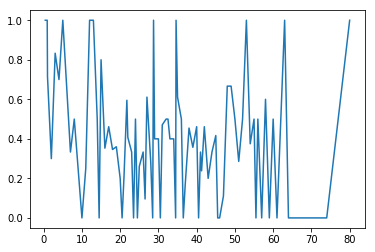

In [19]:
age_rate = data[['Age', 'Survived']].groupby('Age').mean()
plt.plot(age_rate)
show()

In [20]:
ages = data.Age
bins = [0, 18, 40, 60, 90]
cats = pd.cut(ages, bins)
group_names = ['Youth', 'Adult','MiddleAged', 'Senior']
cats = pd.cut(ages, bins, labels=group_names)
pd.value_counts(cats)

Adult         581
MiddleAged    149
Youth         139
Senior         22
Name: Age, dtype: int64

* Discretized age

In [21]:
data['cat_age'] = cats
age_rate = data[['cat_age', 'Survived']].groupby('cat_age').mean()
age_rate['quantity'] = data[['cat_age', 'Survived']].groupby('cat_age').count()
age_rate

,Survived,quantity
cat_age,,
Youth,0.503597,139
Adult,0.364888,581
MiddleAged,0.369128,149
Senior,0.227273,22


* Number of siblings / spouse

In [22]:
sib_rate = data[['Survived', 'SibSp']].groupby('SibSp').mean()
sib_rate['quantity'] = data[['Survived', 'SibSp']].groupby('SibSp').count()
sib_rate
#survival rate increases with 1 and 2 sibling/spouse.
# Categories with quantity less than ~45 can't be taken as representative.

,Survived,quantity
SibSp,,
0,0.345395,608
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


* number of parents / children aboard the Titanic	

In [23]:
parch_rate = data[['Survived', 'Parch']].groupby('Parch').mean()
parch_rate['quantity'] = data[['Survived', 'Parch']].groupby('Parch').count()
parch_rate
# Travelling with 1 or 2 parents / children increases survival rate. 
# Categories with quantity less than ~45 can't be taken as representative

,Survived,quantity
Parch,,
0,0.343658,678
1,0.550847,118
2,0.500000,80
3,0.600000,5
4,0.000000,4
5,0.200000,5
6,0.000000,1


## Plotting

In [24]:
plt.rc('figure', figsize=(15, 9))

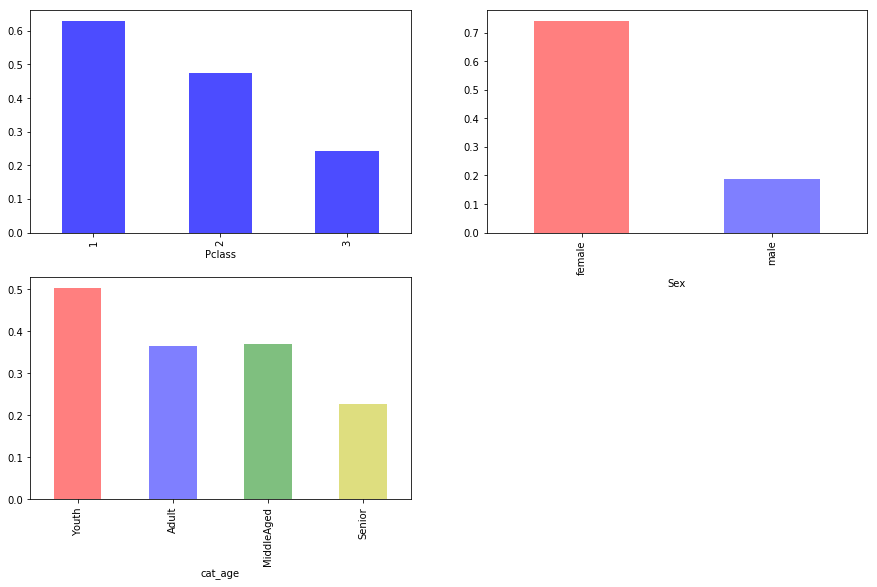

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
class_rate['Survived'].plot.bar(color= ['b'], alpha=0.7)
ax2 = fig.add_subplot(2, 2, 2)
gender_rate['Survived'].plot.bar(color= [['r', 'b'], 'g'], alpha=0.5)
ax3 = fig.add_subplot(2, 2, 3)
age_rate['Survived'].plot.bar(color= [['r', 'b', 'g', 'y']], alpha=0.5)
show()

### Relation between gender and travelling with relatives
I want to know if the survival rate increases at the same rate for women and men with the increase in the number of relatives.

In [26]:
gender_rate1 = data[['Sex', 'Survived']].groupby('Sex').mean()
print(gender_rate1)

sib_rate = data[['Sex', 'Survived', 'SibSp']].groupby(['Sex','SibSp']).mean()
sib_rate['quantity'] = data[['Sex', 'Survived', 'SibSp']].groupby(['Sex','SibSp']).count()
sib_rate


        Survived
Sex             
female  0.742038
male    0.188908


Survived  quantity
Sex    SibSp                    
female 0      0.787356       174
       1      0.754717       106
       2      0.769231        13
       3      0.363636        11
       4      0.333333         6
       5      0.000000         1
       8      0.000000         3
male   0      0.168203       434
       1      0.310680       103
       2      0.200000        15
       3      0.000000         5
       4      0.083333        12
       5      0.000000         4
       8      0.000000         4

In [27]:
parch_rate = data[['Sex', 'Survived', 'Parch']].groupby(['Sex','Parch']).mean()
parch_rate['quantity'] = data[['Sex', 'Survived', 'Parch']].groupby(['Sex','Parch']).count()
parch_rate

Survived  quantity
Sex    Parch                    
female 0      0.788660       194
       1      0.766667        60
       2      0.612245        49
       3      0.750000         4
       4      0.000000         2
       5      0.250000         4
       6      0.000000         1
male   0      0.165289       484
       1      0.327586        58
       2      0.322581        31
       3      0.000000         1
       4      0.000000         2
       5      0.000000         1

Survival rate for women does not show any significant change with the number of relatives (0,1,2).

On the contrary, there is a significant change in the survival rate for men with the increase of relatives from 0 to 1.

** Conclusion: travelling with relatives had a bigger impact in the survival rate of males compared with females.**

# What categories of passengers were most likely to survive the Titanic disaster?

After analizing gender, class, age and # of relatives, I can estimate that young high-class women were most likely to survive the disaster. I will calculate this survival rate.

In [28]:
high_survival = data[['Sex', 'Survived', 'Pclass', 'cat_age']].groupby(['Sex', 'Pclass', 'cat_age']).mean()
high_survival['quatity'] = data[['Sex', 'Survived', 'Pclass', 'cat_age']].groupby(['Sex', 'Pclass', 'cat_age']).count()
high_survival

Survived  quatity
Sex    Pclass cat_age                      
female 1      Youth       0.909091     11.0
              Adult       0.982456     57.0
              MiddleAged  0.958333     24.0
              Senior      1.000000      2.0
       2      Youth       1.000000     14.0
              Adult       0.918367     49.0
              MiddleAged  0.846154     13.0
              Senior           NaN      NaN
       3      Youth       0.511628     43.0
              Adult       0.532609     92.0
              MiddleAged  0.000000      8.0
              Senior      1.000000      1.0
male   1      Youth       0.800000      5.0
              Adult       0.478261     46.0
              MiddleAged  0.305085     59.0
              Senior      0.083333     12.0
       2      Youth       0.600000     15.0
              Adult       0.083333     72.0
              MiddleAged  0.055556     18.0
              Senior      0.333333      3.0
       3      Youth       0.215686     51.0
              Adult       0.128302    265.0
              MiddleAged  0.074074     27.0
              Senior      0.000000      4.0

In [29]:
x = data.Pclass == 1
f_class = data[x]
f_class_rate = f_class[['Sex', 'Survived']].groupby('Sex').mean()
f_class_rate

,Survived
Sex,
female,0.968085
male,0.368852


In [30]:
x = data.Pclass == 2
s_class = data[x]
z = s_class.Age <= 40
s_class_under40 = s_class[z]
s_class_under40_rate = s_class_under40[['Sex', 'Survived']].groupby('Sex').mean()
s_class_under40_rate

,Survived
Sex,
female,0.936508
male,0.172414


## Conclusion: highest survival rate
1. Women travelling in first class (0.97)
2. Women up to age of 40 years travelling in second class (0.93).